In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn import datasets



In [58]:
d = pd.read_csv("./data_assignment2.csv")

# remove outliers
old_data = d.copy()
d = d.drop(d.index[[45, 40, 24, 9]])
d.head(5)

,ID,Living_area,Rooms,Land_size,Biarea,Age,Selling_price
0,1,104,5.0,271.0,25.0,33,4600000
1,2,99,5.0,1506.0,6.0,88,4450000
2,3,133,6.0,486.0,NaN,44,4900000
3,4,175,7.0,728.0,NaN,14,6625000
4,5,118,6.0,1506.0,NaN,29,4600000


Text(0, 0.5, 'Selling price')

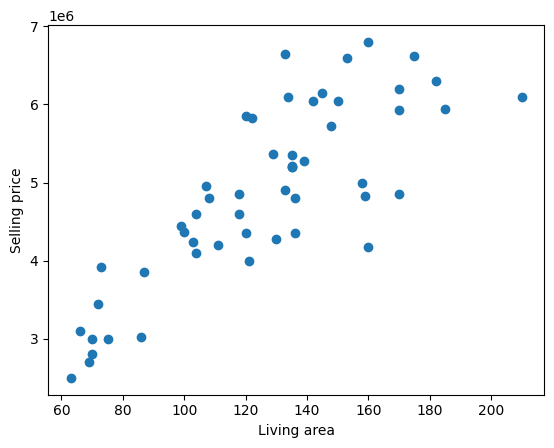

In [59]:
x,y = d['Living_area'], d['Selling_price']
x_not_cleaned,y_not_cleaned = old_data['Living_area'], old_data['Selling_price']
plt.scatter(x,y)
plt.xlabel('Living area')
plt.ylabel('Selling price')

**1a) Find a linear regression model that relates the living area to the selling price.**
**If you did any data cleaning step(s), describe what you did and explain why**

In [60]:
x, y = list(x), list(y)
slope, intercept, r, p, std_err = stats.linregress(x, y)

# Data that hasn't been cleaned
x_not, y_not = list(x_not_cleaned), list(y_not_cleaned)
slope_not, intercept_not, r_not, p_not, std_not = stats.linregress(x_not, y_not)

# Regression function
def regression(x):
    return slope * x + intercept


print(f'Without cleaning the score was {round(r_not, 3)}, after manual cleaning the score was {round(r, 3)}')



Without cleaning the score was 0.562, after manual cleaning the score was 0.817


The correlation value was 0.56 in the original dataset. When we removed the outliers the correlation value increased to 0.82, greatly improving the model. That is why we chose to remove the outliers.

**1b) What are the values of the slope and intercept of the regression line?** 

In [61]:
print(f'The slope is = {round(slope, 2)} kr/m2')
print(f'The intercept is = {round(intercept, 2)} kr')


The slope is = 26686.12 kr/m2
The intercept is = 1504030.05 kr


**1c) Use this model to predict the selling prices of houses which have living area**
**100 m2, 150 m2 and 200 m2**

In [62]:
#100m2 selling price
a = regression(100)
print(f'100m2 predicted selling price: {int(a)} kr')
#150m2 selling price
a = regression(150)
print(f'150m2 predicted selling price: {int(a)} kr')
a = regression(200)
print(f'200m2 predicted selling price: {int(a)} kr')

100m2 predicted selling price: 4172642 kr
150m2 predicted selling price: 5506948 kr
200m2 predicted selling price: 6841254 kr


**1d) Draw a residual plot.** 

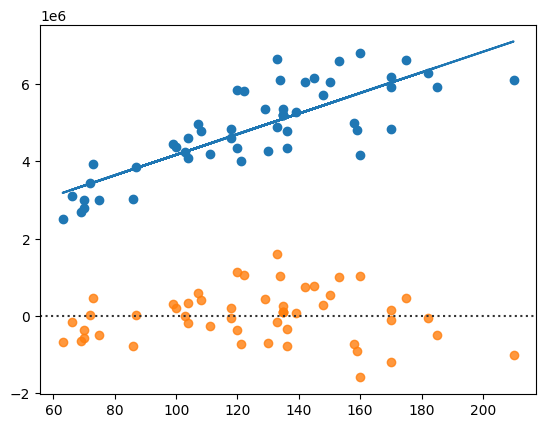

In [63]:
model = list(map(regression, x))
plt.scatter(x, y)
plt.plot(x, model)
sns.residplot(x=x, y=y, data=d)
plt.show()

**2a) Use a confusion matrix to evaluate the use of logistic regression to classify the iris data set**

In [64]:
data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

**2b) Use k-nearest neighbours to classify the iris data set with some different**
**values for k, and with uniform and distance-based weights. What will happen** 
**when k grows larger for the different cases? Why?** 

**2c) Compare the classification models for the iris data set that are generated by** 
**k-nearest neighbours (for the different settings from question b) and by**
**logistic regression. Calculate confusion matrices for these models and discuss** 
**the performance of the various models**